# ACO Algorithm

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from flask import Flask, request, render_template
import io
from flask import Response
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import base64
from flask import make_response
from flask import url_for

In [2]:
def ant_colony_optimization(coordinates, start_node, num_ants, num_iterations, evaporation_rate, alpha, beta):
    num_nodes = len(coordinates)
    distances = np.zeros((num_nodes, num_nodes))
    #nodes = np.arange(0,num_nodes)

    # Calculate distances between nodes using Euclidean distance
    for i in range(num_nodes):
        for j in range(i, num_nodes):
            dist = np.sqrt((coordinates[i][0] - coordinates[j][0])**2 + (coordinates[i][1] - coordinates[j][1])**2)
            distances[i][j] = dist
            distances[j][i] = dist
    
    #print(distances)
    # Initialize pheromone matrix
    pheromone = np.ones((num_nodes, num_nodes))

    # Initialize best path and distance
    best_path = []
    best_distance = float('inf')
    #start_node = np.random.choice(nodes)

    #iteration loop - runs n times
    for iteration in range(num_iterations):
        # Initialize ants
        ants = [[] for _ in range(num_ants)]
        for ant in ants:
            ant.append(start_node)

        # Ants construct solutions
        for i in range(num_nodes-1):
            for ant in ants:
                current_node = ant[-1]
                unvisited_nodes = [node for node in range(num_nodes) if node not in ant] # finds all the current unvisited nodes
                probabilities = [np.power(pheromone[current_node][j], alpha) * np.power(1/distances[current_node][j], beta) for j in unvisited_nodes]
                probabilities = probabilities / np.sum(probabilities)#update pheromone in local optima - as we're sending in probabilities to choose next node.
                next_node = np.random.choice(unvisited_nodes, p=probabilities)#weighted decision at random
                ant.append(next_node)
                

        # Update pheromone in global optima
        for i in range(num_ants):
            path_distance = 0
            for j in range(num_nodes-1):
                current_node = ants[i][j]
                next_node = ants[i][j+1]
                path_distance += distances[current_node][next_node] # attaches the distance to the best path from the distances matrix
                
            if path_distance < best_distance:
                best_distance = path_distance
                best_path = ants[i] #update the best path

            for j in range(num_nodes-1):
                current_node = ants[i][j]
                next_node = ants[i][j+1]
                #evaporates the pheromones from the paths not being taken
                pheromone[current_node][next_node] = (1-evaporation_rate) * pheromone[current_node][next_node] + evaporation_rate / path_distance
              
        # Reset ants
        ants = [[] for _ in range(num_ants)]
        for ant in ants:
            ant.append(start_node)
    
    best_path.append(start_node)

    return best_path, best_distance


In [10]:
#this takes the coordinates from the file and makes a list of coordinates suited for distance calculation
with open("untitled1.txt", "r") as f:
    # Initialize an empty list to store the tuples
    city_coords = []
    # Read the file line by line
    for line in f:
        # Split the line into its components
        components = line.strip().split()
        # Convert the components to integers and floats as necessary
        node_num = int(components[0])
        x_coord = float(components[1])
        y_coord = float(components[2])
        # Create a tuple with the coordinates and append it to the list
        city_coords.append((x_coord, y_coord))

start_node = 0
num_ants = 10
num_iterations = 100
evaporation_rate = 0.5
alpha = 1
beta = 3

best_path, best_path_length = ant_colony_optimization(
    city_coords, start_node, num_ants, num_iterations,
    evaporation_rate, alpha, beta
)

print("Best path: ", best_path)
print("Best path length: ", best_path_length)

Best path:  [0, 57, 66, 27, 92, 7, 41, 88, 30, 79, 55, 52, 78, 9, 83, 35, 98, 37, 23, 15, 87, 21, 18, 96, 89, 71, 58, 73, 20, 46, 62, 5, 48, 17, 93, 3, 64, 65, 25, 69, 74, 91, 80, 24, 60, 86, 56, 6, 8, 85, 11, 26, 19, 54, 82, 38, 32, 12, 75, 94, 49, 43, 1, 53, 39, 63, 31, 14, 16, 10, 90, 97, 22, 61, 59, 76, 34, 33, 45, 2, 42, 40, 70, 99, 28, 13, 4, 36, 81, 67, 84, 95, 77, 51, 47, 29, 72, 68, 50, 44, 0]
Best path length:  36043.44027392863


num_ants: 10
num_iterations: 100
Best path: 
[0, 57, 66, 27, 92, 7, 41, 88, 30, 79, 55, 52, 78, 9, 83, 35, 98, 37, 23, 15, 87, 21, 18, 96, 89, 71, 58, 73, 20, 46, 62, 5, 48, 17, 93, 3, 64, 65, 25, 69, 74, 91, 80, 24, 60, 86, 56, 6, 8, 85, 11, 26, 19, 54, 82, 38, 32, 12, 75, 94, 49, 43, 1, 53, 39, 63, 31, 14, 16, 10, 90, 97, 22, 61, 59, 76, 34, 33, 45, 2, 42, 40, 70, 99, 28, 13, 4, 36, 81, 67, 84, 95, 77, 51, 47, 29, 72, 68, 50, 44, 0]
Best path length: 
36043.44027392863


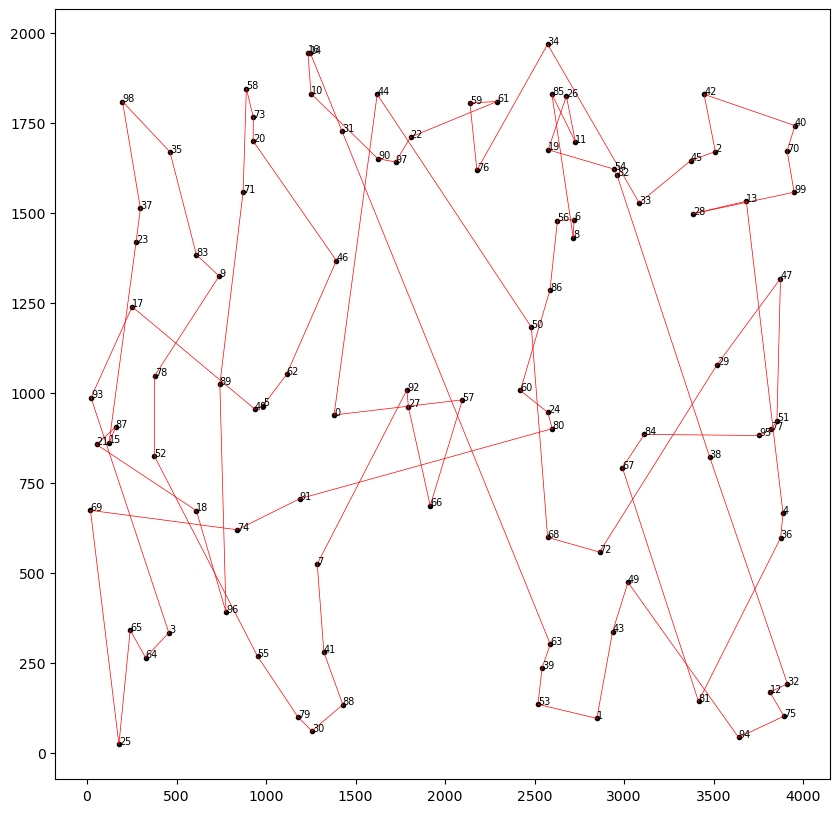

In [11]:
def print_aco(city_coords, num_ants, num_iterations, best_path, best_path_length):
    print("num_ants:" ,num_ants)
    print("num_iterations:", num_iterations)
    print("Best path: ")
    print(best_path)
    print("Best path length: ")
    print(best_path_length)
    
    plt.rcParams['figure.figsize'] = [10, 10]
    for i in range(len(city_coords)):
        plt.scatter(city_coords[i][0], city_coords[i][1],marker='.', color='black')
        plt.text(city_coords[i][0], city_coords[i][1], str(i), fontsize=7)

    # Plot the path
    for i in range(len(best_path)-1):
        plt.plot([city_coords[best_path[i]][0], city_coords[best_path[i+1]][0]], [city_coords[best_path[i]][1], city_coords[best_path[i+1]][1]], 'r-', linewidth=0.5)

    plt.show()
    
print_aco(city_coords, num_ants, num_iterations, best_path, best_path_length)

# Flask App UI - Now deployed on arora20b.pythonanywhere.com


In [6]:
app1 = Flask(__name__, static_url_path='/static')

@app1.route('/', methods=['GET'])
def index():
    # If it's a GET request, render the form
    return render_template('index.html')


@app1.route('/plot', methods=['POST'])
def plot():
    # Get the city coordinates from the uploaded file
    file = request.files['file']
    city_coords = []
    # Read the file line by line
    for line in file:
        # Split the line into its components
        components = line.strip().split()
        # Convert the components to integers and floats as necessary
        node_num = int(components[0])
        x_coord = float(components[1])
        y_coord = float(components[2])
        # Create a tuple with the coordinates and append it to the list
        city_coords.append((x_coord, y_coord))

    # Run the ACO algorithm to get the best path
    
    start_node = 0
    num_ants = 10
    num_iterations = 100
    evaporation_rate = 0.5
    alpha = 1
    beta = 3

    best_path, best_path_length = ant_colony_optimization(
        city_coords, start_node, num_ants, num_iterations,
        evaporation_rate, alpha, beta
    )

    # Generate the plot as before
    plt.rcParams['figure.figsize'] = [10, 10]
    for i in range(len(city_coords)):
        plt.scatter(city_coords[i][0], city_coords[i][1], marker='.', color='black')
        plt.text(city_coords[i][0], city_coords[i][1], str(i), fontsize=7)

    for i in range(len(best_path)-1):
        plt.plot([city_coords[best_path[i]][0], city_coords[best_path[i+1]][0]], [city_coords[best_path[i]][1], city_coords[best_path[i+1]][1]], 'r-', linewidth=0.5)

    img_bytes = io.BytesIO()
    plt.savefig(img_bytes, format='png')
    img_bytes.seek(0)
    
    path_str = '[' + ', '.join(str(x) for x in best_path) + ']'
    distance = str(best_path_length)
    img_data = base64.b64encode(img_bytes.read()).decode('utf-8')

    return render_template('plot.html', path=path_str, distance=distance, img_data=img_data)


@app1.route('/static/styles.css')
def styles():
    return app1.send_static_file('styles.css')   


In [ ]:
app1.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [11/Apr/2023 12:35:00] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Apr/2023 12:35:01] "GET /static/styles.css HTTP/1.1" 304 -
127.0.0.1 - - [11/Apr/2023 12:35:35] "POST /plot HTTP/1.1" 200 -
127.0.0.1 - - [11/Apr/2023 12:35:35] "GET /static/styles.css HTTP/1.1" 304 -
